In [1]:
import pandas as pd
df = pd.read_json(r"E:\Flip robo Internship\CLIENT 1\Cell_Phones_and_Accessories.json")

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import functools
import re
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer 

import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install gensim

  Using cached https://files.pythonhosted.org/packages/0b/66/04faeedb98bfa5f241d0399d0102456886179cabac0355475f23a2978847/gensim-3.8.3-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/1f/be/b14be5c3ad1ff73096b518be1538282f053ec34faaca60a8753d975d7e93/Cython-0.29.14-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/07/cb/5f001272b6faeb23c1c9e0acc04d48eaaf5c862c17709d20e3469c6e0139/jmespath-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/69/79/e6afb3d8b0b4e96cefbdc690f741d7dd24547ff1f94240c997a26fa908d3/s3transfer-0.3.3-py2.py3-none-any.whl
  Running setup.py bdist_wheel for smart-open: started
  Running setup.py bdist_wheel for smart-open: finished with status 'done'
  Stored in directory: C:\Users\RAJSHREE\AppData\Local\pip\Cache\wheels\6a\25\34\a5afefe4e3cad127e65c9bd1b6440c1916feb0bf2f744001e2
  Running setup.py bdist_wheel for boto3: started
  Running setup.py bdist_wheel for boto3: finis

In [6]:
df.head()

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img
0,5,True,"09 1, 2015",B009XD5TPQ,None,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,None,None
1,5,True,"01 9, 2016",B016MF3P3K,None,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,None,None
10,1,True,"01 14, 2016",B00IJJCQBA,{'Color:': ' Black / Black'},Stephanie,To tight on my phone and the bottom piece was ...,One Star,1452729600,None,None
100,5,False,"06 21, 2017",B00NIJOGOG,{'Color:': ' Rose Gold [6+] CHOOSE CORRECT SIZ...,SG,"Very good and superior quality, looks great. M...",Very nice and good quality!!!,1498003200,None,None
1000,3,True,"06 10, 2015",B00MQYS97Y,None,Linda,"The charger is not working, however ! The comp...",Not happy,1433894400,None,None


In [7]:
df.isnull().sum()

Rating                   0
Rev_verify               0
Review_Date              0
IC                       0
Prod_meta           352624
Reviewer_Name           91
Review                 530
Rev_summ               355
Review_timestamp         0
Useful              698250
Prod_img            742256
dtype: int64

In [8]:
df.dropna(subset=['Review','Rev_summ'], inplace=True)

In [9]:
df.isnull().sum()

Rating                   0
Rev_verify               0
Review_Date              0
IC                       0
Prod_meta           352259
Reviewer_Name           89
Review                   0
Rev_summ                 0
Review_timestamp         0
Useful              697443
Prod_img            741480
dtype: int64

we have dropped na values from Review and Rev_summ, no na values are present in that columna

droping the column which are having high null values along with the unnecessary columns

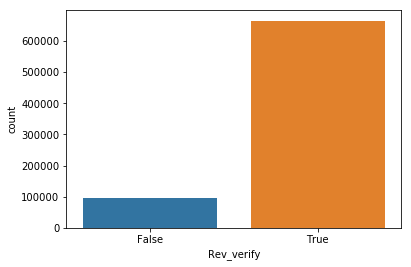

checking the count of the Verified and Unverified reviews
True     664660
False     94942
Name: Rev_verify, dtype: int64
checking the % of the Verified and Unverified reviews


True     87.501086
False    12.498914
Name: Rev_verify, dtype: float64

In [10]:
sns.countplot('Rev_verify',data=df)
plt.show()

print('checking the count of the Verified and Unverified reviews')
print(df.Rev_verify.value_counts())

print('checking the % of the Verified and Unverified reviews')
(df.Rev_verify.value_counts()/len(df.Rev_verify))*100

In [11]:
#average rating
average_ratings = round(df.groupby(['IC'])['Rating'].mean().reset_index(),2)

In [12]:
average_ratings.head()
average_ratings.shape

(48133, 2)

In [13]:
minimum_ratings = df.groupby(['IC'])['Rating'].min().reset_index()

In [14]:
minimum_ratings.head()
minimum_ratings.shape

(48133, 2)

In [15]:
maximum_ratings = df.groupby(['IC'])['Rating'].max().reset_index()

In [16]:
maximum_ratings.head()
maximum_ratings.shape

(48133, 2)

In [17]:
total_ratings = df.groupby(['IC'])['Rating'].count().reset_index()

In [18]:
total_ratings.head()
total_ratings.shape

(48133, 2)

In [19]:
#Getting the unique IC value
unique_ic = df['IC'].unique()

#Creating a data frame from ic values
df_ic = pd.DataFrame(data=unique_ic,columns=['IC'])

In [20]:
one_star_rating = round(df[df['Rating']==1].groupby(['IC'])['Rating'].count().reset_index())
two_star_rating = round(df[df['Rating']==2].groupby(['IC'])['Rating'].count().reset_index())
three_star_rating = round(df[df['Rating']==3].groupby(['IC'])['Rating'].count().reset_index())
four_star_rating = round(df[df['Rating']==4].groupby(['IC'])['Rating'].count().reset_index())
five_star_rating = round(df[df['Rating']==5].groupby(['IC'])['Rating'].count().reset_index())

In [21]:
df_indi_rating_count = df_ic.merge(one_star_rating,on='IC',how='left').merge(two_star_rating,how='left',on='IC').merge(three_star_rating,how='left',on='IC').merge(four_star_rating,how='left',on='IC').merge(five_star_rating,how='left',on='IC')

In [22]:
df_indi_rating_count.columns = ['IC','1 star ratings','2 star ratings','3 star ratings','4 star ratings','5 star ratings']

In [23]:
df_indi_rating_count = df_indi_rating_count.fillna(0)
df_indi_rating_count.isnull().sum()

IC                0
1 star ratings    0
2 star ratings    0
3 star ratings    0
4 star ratings    0
5 star ratings    0
dtype: int64

In [24]:
for col in df_indi_rating_count.select_dtypes(include=['float']).columns:
    df_indi_rating_count[col] = df_indi_rating_count[col].astype(int)

In [25]:
df_indi_rating_count.sample(10)

,IC,1 star ratings,2 star ratings,3 star ratings,4 star ratings,5 star ratings
37042,B00SR8BNM6,0,0,1,1,4
17855,B00X95F0ZI,3,0,2,2,3
27561,B00XLCDVGO,1,1,0,0,4
3229,B01E9ILNUE,7,2,6,10,61
42807,B00NEUCRCM,0,1,1,0,3
16749,B00CF39SB2,0,0,0,1,13
44287,B0108LYNKI,0,0,0,1,3
38829,B00VTEJKEI,0,0,0,2,2
43010,B01C3Z6ZIU,0,0,1,1,5
36563,B007HS0X2S,0,0,0,0,3


In [26]:
df_rating_set = [total_ratings, average_ratings, maximum_ratings, minimum_ratings,df_indi_rating_count]

In [27]:
df_rating_data = functools.reduce(lambda left,right: pd.merge(left,right,on='IC'), df_rating_set)

In [28]:
df_rating_data.columns=['IC','Total rating','Average rating','Maximum rating','Minimum rating','1 star ratings','2 star ratings','3 star ratings','4 star ratings','5 star ratings']

In [29]:
df_rating_data.shape

(48133, 10)

In [30]:
df_rating_data

,IC,Total rating,Average rating,Maximum rating,Minimum rating,1 star ratings,2 star ratings,3 star ratings,4 star ratings,5 star ratings
0,7508492919,40,4.30,5,1,1,1,4,13,21
1,7532385086,7,3.29,5,1,2,0,1,2,2
2,7887421268,13,3.54,5,1,3,1,1,2,6
3,8199900164,4,3.75,5,2,0,1,1,0,2
4,8288853439,11,3.82,5,1,2,1,0,2,6
5,8288862993,32,3.66,5,1,6,3,2,6,15
6,828886922X,6,4.33,5,3,0,0,1,2,3
7,8288878881,44,3.98,5,1,6,2,5,5,26
8,9578085451,4,4.25,5,3,0,0,1,1,2
9,961301375X,13,3.92,5,1,3,0,0,2,8


In [31]:
df_rating_data.to_csv('df_rating_data.csv',index_label=False)

In [32]:
# Rev_verify, Review_date, Prod_meta, Reviewer_Name, Review_timestamp, Useful and Prod_img and Review dropped
df_ext = df.loc[:,['IC','Rev_summ']]

In [33]:
df_ext.isnull().sum()

IC          0
Rev_summ    0
dtype: int64

In [34]:
df_ext["Rev Length"]= df_ext["Rev_summ"].str.len()

In [35]:
df_ext.sort_values("IC", inplace = True)

In [36]:
df_ext.shape

(759602, 3)

In [37]:
df_ext.drop_duplicates(inplace=True)

In [38]:
df_ext.shape

(608602, 3)

In [39]:
df_ext.nunique()

IC             48133
Rev_summ      366596
Rev Length       153
dtype: int64

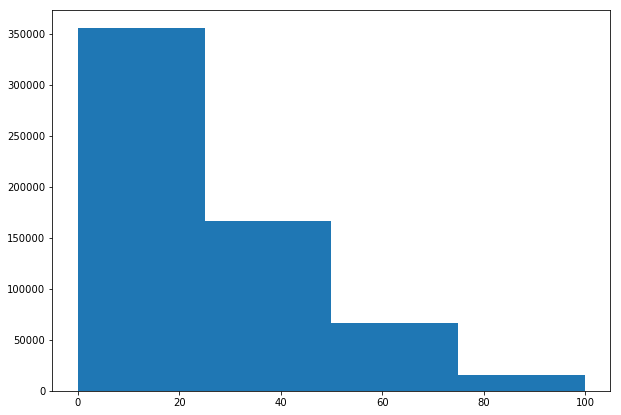

In [40]:
#plotting distribution
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(df_ext['Rev Length'], bins = [0, 25, 50, 75, 100]) 
plt.show()

In [41]:
df_merge = df_ext.groupby(['IC'])['Rev_summ'].apply('. '.join).reset_index()

In [42]:
df_merge.shape

(48133, 2)

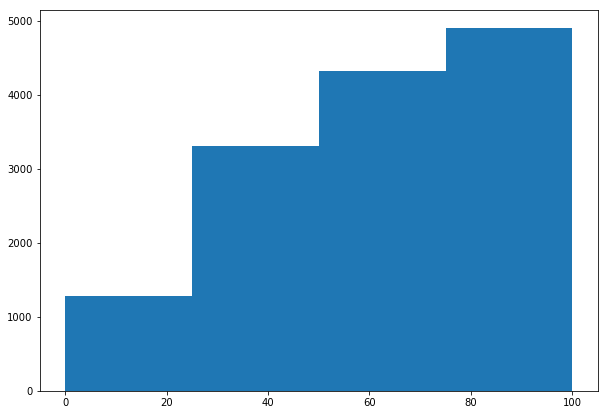

In [43]:
#plotting distribution of string 
df_merge["Rev Length"]= df_merge["Rev_summ"].str.len() 
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(df_merge['Rev Length'], bins = [0, 25, 50, 75, 100]) 
plt.show()

# Fetching summary & keywords

In [44]:
df_merge.rename(columns={"IC":'Product_name',"Rev_summ":'prod_des'},inplace=True)

In [45]:
data = df_merge

In [46]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RAJSHREE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [77]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz


  Running setup.py bdist_wheel for en-core-web-sm: started
  Running setup.py bdist_wheel for en-core-web-sm: finished with status 'done'
  Stored in directory: C:\Users\RAJSHREE\AppData\Local\pip\Cache\wheels\48\5c\1c\15f9d02afc8221a668d2172446dd8467b20cdb9aef80a172a4
Successfully built en-core-web-sm


In [84]:
import spacy
!pip install neuralcoref --no-binary neuralcoref

nlp = en_core_web_sm.load()

  Using cached https://files.pythonhosted.org/packages/0c/40/8db3db763077fe80b71859f57731261aeb03cc624635f97a3bcfe55ab37b/neuralcoref-4.0.tar.gz
Skipping bdist_wheel for neuralcoref, due to binaries being disabled for it.
  Running setup.py install for neuralcoref: started
    Running setup.py install for neuralcoref: finished with status 'error'
    Complete output from command C:\Users\RAJSHREE\Anaconda3\envs\nlp_course\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\RAJSHREE\\AppData\\Local\\Temp\\pip-install-9_bcc2pj\\neuralcoref\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\RAJSHREE\AppData\Local\Temp\pip-record-nuxh9_j_\install-record.txt --single-version-externally-managed --compile:
    running install
    running build
    running build_py
    creating build
    creating build\lib.win-amd64-3.7
    creating build\lib.win-amd64-3.7\neuralcor

Command "C:\Users\RAJSHREE\Anaconda3\envs\nlp_course\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\RAJSHREE\\AppData\\Local\\Temp\\pip-install-9_bcc2pj\\neuralcoref\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\RAJSHREE\AppData\Local\Temp\pip-record-nuxh9_j_\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\RAJSHREE\AppData\Local\Temp\pip-install-9_bcc2pj\neuralcoref\


ValueError: spacy.morphology.Morphology size changed, may indicate binary incompatibility. Expected 112 from C header, got 104 from PyObject

In [54]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAJSHREE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RAJSHREE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RAJSHREE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True